In questo file (temperaturesByCountry.ipynb):
 

Usando il file GlobalLandTemperaturesByCountry.csv
Costruire funzioni per:
• Mostrare l’andamento nel tempo per un determinato mese e per un determinato paese -> "lineGraphCountry(dataset_country)"
• Calcolare la retta di regressione -> "utilities.regressionLine(x,y, title)"
• Identificare quale paese tra Italia, Francia e Germania ha la ‘peggiore’ retta di regressione negli ultimi 25 anni -> "regressionLineLastYears(dataset_country)"

 
Per quanto riguarda l'ultimo punto, si è deciso di calcolare gli ultimi 25 anni a partire dal 2013, ossia l'ultimo anno presente nel dataset considerato. 

In [26]:
import calendar
from random import random, choice

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utilities
from sklearn.metrics import r2_score
from sklearn.svm._libsvm import predict



In [27]:
datasetPath3 = './GlobalLandTemperaturesByCountry.csv'
dataset_country = pd.read_csv(datasetPath3)
dataset_globalTemperaturesByCountries = pd.DataFrame(dataset_country, columns=['dt', 'AverageTemperature',
                                                                        'AverageTemperatureUncertainty',
                                                                        'Country'])


In [28]:
def lineGraphCountry(dataset_country):
    """
    Funzione che mostra l'andamento nel tempo per un determinato mese e per un determinato paese per
    GlobalLandTemperaturesByCountry.csv
    :param dataset_city: dataset
    :return years: lista anni
    :return avgTemperatures: lista temperature medie
    :return calendar.month_name[month]: mese selezionato
    :return country: paese selezionato
    """

    month = utilities.chooseMonth()
    print("Mese selezionato: ", calendar.month_name[month])

    country = utilities.chooseRandom(dataset_country['Country'],"country")
    
    #Rimozione NaN
    dataset_country.dropna(inplace=True)

    print("Nazione selezionata randomicamente = ", country)
    
    # indici nel dataset della nazione specificata
    index = dataset_country.index[dataset_country['Country'] == country].tolist()
    #print("--> index: ", index, "len index: ", len(index))

    avgTemperatures = []
    years = []

    # Recupero le temperature per ogni anno per il mese selezionato
    for i in index:
        date = dataset_country['dt'][i]
        parsedMonth = int(date[5:-3])
        if parsedMonth == month:
            years.append(np.float64(date[:-6]))
            avgTemperatures.append(dataset_country['AverageTemperature'][i])


    # grafico
    fig = plt.figure()
    #plt.errorbar(years, avgTemperatures, label='avgTemperatures', elinewidth=10)
    plt.plot(years, avgTemperatures)
    plt.title("Average Temperature in " + country + " in the month of " + calendar.month_name[month])
    plt.xlabel("Years")
    plt.ylabel("Temperature")
    plt.show()

    return years, avgTemperatures, calendar.month_name[month], country

Inserire numero mese per visualizzare grafico:
 - Gennaio: 1
 - Febbraio: 2
 - Marzo: 3
 - Aprile: 4
 - Maggio: 5
 - Giugno: 6
 - Luglio: 7
 - Agosto: 8
 - Settembre: 9
 - Ottobre: 10
 - Novembre: 11
 - Dicembre: 12

Inserire un numero tra quelli elencati:


 10


Mese selezionato:  October
Nazione selezionata randomicamente =  Bhutan


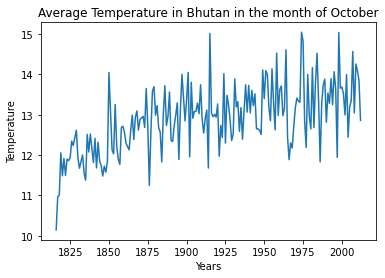

In [29]:
#Grafico della temperatura di una nazione in un determinato mese negli anni
x, y , month, country= lineGraphCountry(dataset_country)



m:  0.008812525570832544 b: -3.972817333523515


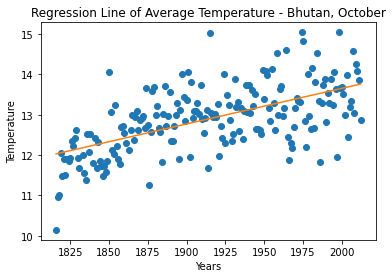

In [30]:
#Retta di regressione
title = "Regression Line of Average Temperature - " + country + ", " + month
utilities.regressionLine(x,y, title)

In [58]:
def regressionLineLastYears(dataset_country):
    """
    Retta di regressione di di Italia, rancia, Germania negli ultimi 25 anni 
    :param dataset_country: dataset
    """
    dict = {}
    for country in ['Italy', 'France', 'Germany']:

        dataset_country.reset_index(drop=True, inplace=True)
        index = 0
        avgTemperatures = []
        years = []

        index = dataset_country.index[dataset_country['Country'] == country].tolist()
        count = 0

        for i in index:
            date = dataset_country['dt'][i]
            currYear = int(date[:-6])
            if currYear >= 1989 and currYear <= 2013:
                avgTemperatures.append(dataset_country['AverageTemperature'][i])
                years.append(np.float64(date[:-6]))


        title = "Regression Line of Average Temperature - " + country + " last 25 Years"
        utilities.regressionLine(years, avgTemperatures, title)
        model = np.polyfit(years, avgTemperatures, 1)
        predict = np.poly1d(model)
        print(r2_score(avgTemperatures, predict(years)))
        dict[country] = r2_score(avgTemperatures, predict(years))

        #print("R2 score for " + country + " = " + r2_score(avgTemperatures, predict(years)))
    print(dict)
    min_key = min(dict, key=dict.get)
    print("Nazione con valore peggiore della retta di regressione = " + min_key)


m:  0.025331760259177678 b: -36.96601131749142


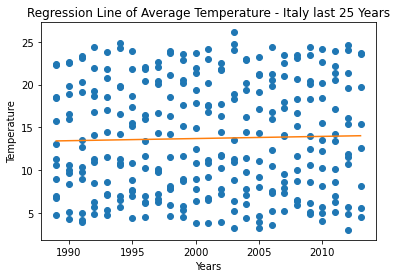

0.0007606847981976861

m:  0.00827963282937249 b: -2.788770215980399


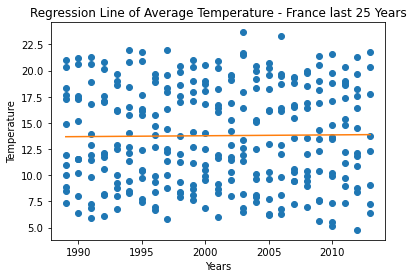

0.000151861542767584

m:  0.008248902087831543 b: -7.242438390925865


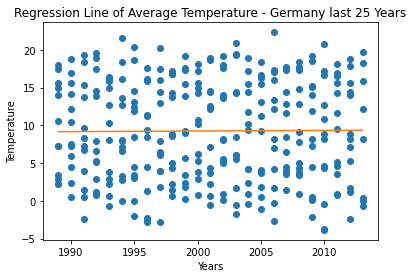

7.72327095520664e-05
{'Italy': 0.0007606847981976861, 'France': 0.000151861542767584, 'Germany': 7.72327095520664e-05}
Nazione con valore peggiore della retta di regressione = Germany


In [59]:
#Retta di regressione di Italia, Francia, Germania negli ultimi 25 anni
regressionLineLastYears(dataset_country)